## Option 1: Pyber

![Ride](Images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* See [Starter Workbook](Pyber/pyber_starter.ipynb) for a reference on expected format.

In [10]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#paths to load csv files
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

#merge the data into a single data set
pyber_data_complete = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

#display the first five rows of data from the merged files
pyber_data_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
##Urban Data##

#conditional statement to grab all the data for Urban cities from the merged dataframe and group it by the city name and put it into a dataframe
urban = pyber_data_complete[pyber_data_complete['type'] == 'Urban'].groupby('city')

#take the Urban data frame and find the average far cost and number of rides.
#use the city data frame from above and run a conditional statement to find the driver count for each urban city
#easier to do it this way because the complete data frame duplicates the driver count per city
urban_fare = urban['fare'].mean()
urban_rides = urban['ride_id'].count()
urban_drivers = city_data[city_data['type'] == 'Urban'].groupby('city')['driver_count'].mean()

In [12]:
##Rural Data##

#conditional statement to grab all the data for Rural cities from the merged dataframe and group it by the city name and put it into a dataframe
rural = pyber_data_complete[pyber_data_complete['type'] == 'Rural'].groupby('city')

#take the Rural data frame and find the average far cost and number of rides.
#use the city data frame from above and run a conditional statement to find the driver count for each rural city
#easier to do it this way because the complete data frame duplicates the driver count per city
rural_fare = rural['fare'].mean()
rural_rides = rural['ride_id'].count()
rural_drivers = city_data[city_data['type'] == 'Rural'].groupby('city')['driver_count'].mean()

In [13]:
##Suburban Data##

#conditional statement to grab all the data for Suburban cities from the merged dataframe and group it by the city name and put it into a dataframe
suburban = pyber_data_complete[pyber_data_complete['type'] == 'Suburban'].groupby('city')

#take the Suburban data frame and find the average far cost and number of rides.
#use the city data frame from above and run a conditional statement to find the driver count for each suburban city
#easier to do it this way because the complete data frame duplicates the driver count per city
suburban_fare = suburban['fare'].mean()
suburban_rides = suburban['ride_id'].count()
suburban_drivers = city_data[city_data['type'] == 'Suburban'].groupby('city')['driver_count'].mean()

## Bubble Plot of Ride Sharing Data

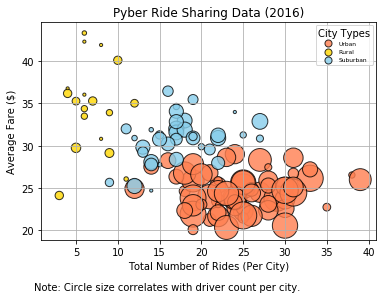

In [14]:
##Plot Data##

#Use the data above to plug into scatter plots for each city type
#multiple the size of each bubble by 10 to duplicate the look of the sample scatter
#coordinate the color for each city per the instructions 
plt.scatter(urban_rides, urban_fare, label = "Urban", s=urban_drivers * 10, color=["coral"], edgecolor="black", alpha = 0.8, marker="o")
plt.scatter(rural_rides, rural_fare, label = "Rural", s=rural_drivers * 10, color=["gold"], edgecolor="black", alpha = 0.8, marker="o")
plt.scatter(suburban_rides, suburban_fare, label = "Suburban", s=suburban_drivers * 10, color=["skyblue"], edgecolor="black", alpha = 0.8, marker="o")
plt.grid()

#assign the title, x-label and y-label to the chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#create the legend
#adjust the size of the bubbles to be uniform. Otherwise it takes the size from the forumla above and they are huge
legend = plt.legend(fontsize = 6, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

#Incorporate a text label regarding circle size
plt.text(0,13,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/Pyber.png")

# Show plot
plt.show()

## Total Fares by City Type

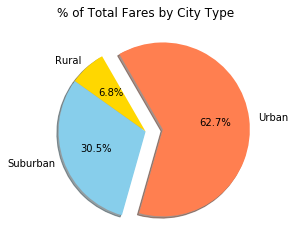

In [15]:
##Find the Percents##

#take the complete dataframe, group by city type and take the sum of the fares
city_type_fares = pyber_data_complete.groupby('type')['fare'].sum()

##Build Pie Chart##
#assign the labels for each city type
#use the colors from the instructions
#explode the urban slice away from the rural and suburban city types
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.2)

#assign the pie sizes, explode the urban city type and apply the labels and colors from above
plt.pie(city_type_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")

#save the pie chart
plt.savefig("Images/Fares_by_City_Type.png")

#show the pie chart
plt.show()

## Total Rides by City Type

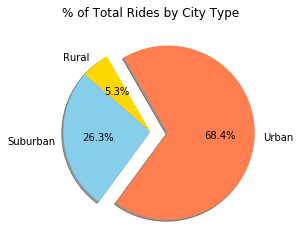

In [16]:
##Find the Percents##

#take the complete dataframe, group by city type and count the number of rides
city_type_rides = pyber_data_complete.groupby('type')['ride_id'].count()

##Build Pie Chart##

#assign the labels for each city type
#use the colors from the instructions
#explode the urban slice away from the rural and suburban city types
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.2)

#assign the pie sizes, explode the urban city type and apply the labels and colors from above
plt.pie(city_type_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Rides by City Type")

#save the pie chart
plt.savefig("Images/Rides_by_City_Type.png")

#show the pie chart
plt.show()

## Total Drivers by City Type

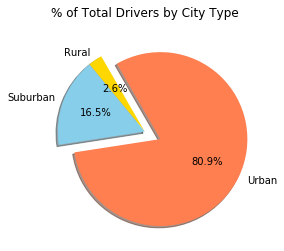

In [19]:
##Find the Percents##

#take the city dataframe, group by city type and count the number of drivers
city_type_rides = city_data.groupby('type')['driver_count'].sum()

##Build Pie Chart##

#assign the labels for each city type
#use the colors from the instructions
#explode the urban slice away from the rural and suburban city types
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.2)

#assign the pie sizes, explode the urban city type and apply the labels and colors from above
plt.pie(city_type_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Drivers by City Type")

#save the pie chart
plt.savefig("Images/Drivers_by_City_Type.png")

#show the pie chart
plt.show()

## Observable Trends

1. The rural city types tend to be more expensive and less frequent, which makes sense given those rides would be further away from populated areas, making them longer and more costly.
2. As the plot shifts from rural to suburban to urban, you can see a direct downward slope which means an increase in the number of rides but less average cost.
3. Even though there are less drivers in the suburban city types, they have a larger percent of total rides than drivers. This means that drivers in suburban cities drive more frequently.